In [21]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#%cd gdrive/MyDrive/Colab\ Notebooks/capstone/model

In [22]:
#!pip install transformers

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline
import pandas as pd

In [24]:
#classifier = pipeline("zero-shot-classification",model="distilbert-base-uncased",device=0)
classifier = pipeline("zero-shot-classification",model="distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

In [28]:
candidate_labels = ["culture", "compensation", "work life balance", "career opportunity"]
# candidate_results = [0,0,0,0,0,0,0,0,0,0]

In [29]:
df_whole=pd.read_csv("finish_sentiment.csv")
df_whole

,company_name,position,location,rate,review_title,review_content,review_date,gvkey,permno,review_sentiment_label,review_sentiment_score
0,American Airlines,Software Developer,"Fort Worth, TX",4.0,all new tech and free flight benefits,overall a good company to work for. work cultu...,2022-01-26,1045,21020.0,POSITIVE,0.999854
1,American Airlines,Customer Service Representative,"Philadelphia, PA",3.0,Great job to have in the tuck.,Amazing travel benefits. Can make your own sch...,2022-01-25,1045,21020.0,POSITIVE,0.999723
2,American Airlines,Reservations Agent,"Fort Worth, TX",3.0,It's a call center job,"Lots of micromangement, mandatory overtime and...",2022-01-24,1045,21020.0,NEGATIVE,0.976279
3,American Airlines,Customer Service Representative,"Arlington, VA",5.0,N/a,Great place to work. life/balance. flexible wo...,2022-01-24,1045,21020.0,POSITIVE,0.999861
4,American Airlines,Customer Service Representative,"Austin, TX",4.0,The flight benefits are great but you work hol...,I loved that everyday you see something new on...,2022-01-23,1045,21020.0,POSITIVE,0.999312
...,...,...,...,...,...,...,...,...,...,...,...
2328269,LyondellBasell,Enterprise Technical Lead,"Houston, TX",4.0,Lyondell Basell,excellent company to work for. great culture. ...,2012-08-27,294524,12345.0,POSITIVE,0.999886
2328270,LyondellBasell,Sr. Research Specialist,High bays and Labs,5.0,Bench Scale to Pilot units,Operating unit. Mantainig ang repairing. proce...,2012-08-18,294524,12345.0,POSITIVE,0.997253
2328271,LyondellBasell,Accounting Assistant II,"houston, texas",3.0,coworkers were like family,It was nice in the beginning 5 years prior aft...,2012-08-14,294524,12345.0,NEGATIVE,0.975529
2328272,LyondellBasell,Administrative Assistant,"Houston, TX",3.0,Review,"Typical day is reading/responding to emails, r...",2012-08-09,294524,12345.0,POSITIVE,0.978332


In [30]:
#df=df_whole
df=df_whole.iloc[518998:600000,:]

df["culture"]=""
df["compensation"]=""
df["work life balance"]=""
df["career opportunity"]=""

df

<ipython-input-30-4ad01d4443ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["culture"]=""
<ipython-input-30-4ad01d4443ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["compensation"]=""
<ipython-input-30-4ad01d4443ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,company_name,position,location,rate,review_title,review_content,review_date,gvkey,permno,review_sentiment_label,review_sentiment_score,culture,compensation,work life balance,career opportunity
518998,General Motors,Process Engineer,"Wentzville, MO",3.0,Productive - traditional manufacturing environ...,Poor Job work/life balance - average about one...,2016-03-31,5073,12369.0,POSITIVE,0.686433,,,,
518999,General Motors,EIT tool room,"Lansing, MI",5.0,People make the difference,Over the last 35 plus years I have found that ...,2016-03-29,5073,12369.0,POSITIVE,0.998088,,,,
519000,General Motors,Assembly Worker,"Warren, OH 44481",3.0,"Good place for some, but not for everyone","You will work from 40 to 48 hours (5 to 6, 8-h...",2016-03-25,5073,12369.0,POSITIVE,0.823553,,,,
519001,General Motors,Customer service Representative,"Austin, TX",4.0,Hard to keep up with metrics.,"A typical day at work is really easy, relaxed,...",2016-03-24,5073,12369.0,NEGATIVE,0.986446,,,,
519002,General Motors,Technology Team Manager,"Detroit, MI",4.0,Great Place to Work,The environment now is better than it ever was...,2016-03-24,5073,12369.0,POSITIVE,0.999676,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,The Home Depot,Cashier,"Jonesboro, AR",5.0,Great place to work.,"I really enjoyed working there, it felt like a...",2013-07-27,5680,66181.0,POSITIVE,0.999798,,,,
599996,The Home Depot,Paint Specialist and Sales Associate,"Wichita Falls, TX",4.0,"Good place, too much drama.",Was an ok place to work for. There was a littl...,2013-07-27,5680,66181.0,POSITIVE,0.999279,,,,
599997,The Home Depot,Cashier,"Rochester, NY",3.0,"Not a bad place, but not great either",They would work a little bit with my visitatio...,2013-07-27,5680,66181.0,POSITIVE,0.997789,,,,
599998,The Home Depot,Warehouse Worker,"Rochester, NY",4.0,Very Productive and fun place to work.,"I enjoyed working at the Home Depot, it was a ...",2013-07-27,5680,66181.0,POSITIVE,0.999872,,,,


Model

In [31]:
i=0

In [32]:
file_name="light-zero-shot-class-518998.csv"

In [33]:
for item,row in df.iterrows():
  try:
    review_content=row["review_content"]
    #print(item)
    #print(i)
    #print(review_content)
    #print("*********************************")
    class_result=classifier(review_content,candidate_labels,multi_label=True)
    label_result=class_result["labels"]
    prob_result=class_result["scores"]
    
    for flag in range(len(label_result)):
        df.loc[item,label_result[flag]]=prob_result[flag]
    
    # write to csv per 200 row
    if i >0 and i%200==0:
        print(i)
        print("*********************************")
        temp_write_class=df.iloc[i-200:i,:]
        temp_write_class.to_csv(file_name, mode='a', index=True, header=False, encoding='utf-8_sig')
    
    i=i+1
  except Exception as e:
    print(e)    
    # write to csv per 200 row
    if i >0 and i%200==0:
        print(i)
        print("#####################3")
        temp_write_review=df.iloc[i-200:i,:]
        temp_write_review.to_csv(file_name, mode='a', index=True, header=False, encoding='utf-8_sig')
    
    i=i+1

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


200
*********************************
400
*********************************
600
*********************************
800
*********************************
1000
*********************************
1200
*********************************
1400
*********************************
1600
*********************************
1800
*********************************
2000
*********************************
2200
*********************************
2400
*********************************
2600
*********************************
2800
*********************************
3000
*********************************
3200
*********************************
3400
*********************************
3600
*********************************
3800
*********************************
4000
*********************************
4200
*********************************
4400
*********************************
4600
*********************************
4800
*********************************
5000
*********************************
5200
************************

41600
*********************************
41800
*********************************
42000
*********************************
42200
*********************************
42400
*********************************
42600
*********************************
42800
*********************************
43000
*********************************
43200
*********************************
43400
*********************************
43600
*********************************
43800
*********************************
44000
*********************************
44200
*********************************
44400
*********************************
44600
*********************************
44800
*********************************
45000
*********************************
45200
*********************************
45400
*********************************
45600
*********************************
45800
*********************************
46000
*********************************
46200
*********************************
46400
*********************************


In [34]:
1+1

2

# 

In [ ]:
1+1

In [10]:
df

,company_name,position,location,rate,review_title,review_content,review_date,gvkey,permno,review_sentiment_label,...,enjoyed working,culture,working pace,pay,benefits,work life balance,advancement,learning experience,friendly environment,health insurance
0,American Airlines,Software Developer,"Fort Worth, TX",4.0,all new tech and free flight benefits,overall a good company to work for. work cultu...,2022-01-26,1045,21020.0,POSITIVE,...,0.986408,0.977384,0.574057,0.116284,0.550706,0.982535,0.46435,0.88545,0.990675,0.25617
1,American Airlines,Customer Service Representative,"Philadelphia, PA",3.0,Great job to have in the tuck.,Amazing travel benefits. Can make your own sch...,2022-01-25,1045,21020.0,POSITIVE,...,0.942215,0.762717,0.310461,0.507911,0.977276,0.908835,0.421239,0.570431,0.990387,0.0103885
2,American Airlines,Reservations Agent,"Fort Worth, TX",3.0,It's a call center job,"Lots of micromangement, mandatory overtime and...",2022-01-24,1045,21020.0,NEGATIVE,...,0.277161,0.641128,0.717143,0.868664,0.89557,0.482118,0.145456,0.778327,0.00189786,0.330629
3,American Airlines,Customer Service Representative,"Arlington, VA",5.0,N/a,Great place to work. life/balance. flexible wo...,2022-01-24,1045,21020.0,POSITIVE,...,0.99074,0.565849,0.92287,0.330312,0.974829,0.98049,0.43644,0.592779,0.990659,0.876019
4,American Airlines,Customer Service Representative,"Austin, TX",4.0,The flight benefits are great but you work hol...,I loved that everyday you see something new on...,2022-01-23,1045,21020.0,POSITIVE,...,0.985101,0.59378,0.675657,0.339255,0.51422,0.688675,0.446986,0.974587,0.829887,0.207077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,American Airlines,Captain,"Norton, MA",5.0,Its the best,American airlines is one of the best places to...,2020-02-13,1045,21020.0,POSITIVE,...,0.983134,0.69004,0.435245,0.522475,0.987802,0.805904,0.809579,0.811999,0.990426,0.122947
796,American Airlines,Technical Editor - Tech Ops/Tech Pubs (Airfram...,"Tulsa, OK",5.0,Great benefits and people.,"Great work atmosphere, flight benefits are the...",2020-02-13,1045,21020.0,POSITIVE,...,0.9918,0.930016,0.721866,0.861746,0.995883,0.721664,0.486067,0.705348,0.979609,0.0558972
797,American Airlines,Operations Specialist,"Fort Worth, TX",4.0,Nice work environment with updated work space ...,While working for American Airlines is overall...,2020-02-13,1045,21020.0,NEGATIVE,...,0.606806,0.836912,0.623463,0.403941,0.0940243,0.390394,0.410878,0.76316,0.18542,0.0190793
798,American Airlines,Delivery Lead - Production Support & DevOps,"Dallas, TX",4.0,Productive and Fun Working Here,It was a very nice experience. Everyone is fri...,2020-02-13,1045,21020.0,POSITIVE,...,0.996957,0.775915,0.676231,0.227413,0.697612,0.849104,0.774295,0.989075,0.998886,0.383973


In [9]:
pd.read_csv(file_name)

,271199,Computer Science Corporation,Executive Administrative Assistant,"Fort Hood, TX",3.0,"Great benefits, great pay. Management in 2005 was sexist.",I worked for this company and left for Maternity Leave. When I returned (on the previously planned and scheduled day) I was told my position had been given to the temp that had taken my place when I left. I was told that she dressed more feminine than I did. I am disabled and needed to wear specific laced shoes. I dressed in black slacks or khaki slacks with polos or blouses as did the rest of the all-male staff. The employer knew of my reasoning for dressing the way I did.,2013-10-29,3336,40125.0,NEGATIVE,0.9991538524627686,0.48177698254585266,0.48180463910102844,0.48303142189979553,0.48363977670669556
0,271200,Computer Science Corporation,Communications Subsystem Engineer,"Lanham, MD",3.0,"Secured place to work, friendly people to work...",Great Project staff to work with. Open to sugg...,2013-10-25,3336,40125.0,POSITIVE,0.999269,0.482465,0.480440,0.482832,0.483786
1,271201,Computer Science Corporation,Logistics Coordinator,"Falls Church, VA",4.0,Overseas Contracting,Work with Various system worked 12HR days trul...,2013-10-23,3336,40125.0,POSITIVE,0.982095,0.498310,0.489464,0.495653,0.495048
2,271202,Computer Science Corporation,Customer Service Representative,"Barbourville, KY",3.0,Long,Makes for a long work day but enjoyed working ...,2013-10-22,3336,40125.0,POSITIVE,0.993015,0.500444,0.498390,0.500968,0.504701
3,271203,Computer Science Corporation,Field Service Technician,"Saint Paul, MN",3.0,Large corporation that loses sight of its most...,My day consisted of incident management and ha...,2013-10-22,3336,40125.0,NEGATIVE,0.997400,0.478859,0.479466,0.479904,0.480793
4,271204,Computer Science Corporation,Navy Knowledge Online (NKO) Task Lead,"Pensacola, FL",4.0,Quick learner of databases and self starter.,"Provide project management, quality assurance,...",2013-10-17,3336,40125.0,POSITIVE,0.998055,0.498608,0.497177,0.498211,0.499307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247794,518994,General Motors,Voice of the Customer Specialist,"Warren, MI",4.0,Great place to work.,Working at the General Motors Tech Center in W...,2016-04-04,5073,12369.0,POSITIVE,0.989432,0.490821,0.488383,0.489548,0.489056
247795,518995,General Motors,Process Engineer,"Moraine, OH",4.0,Great team to work with,The workers at General Motors are dedicated to...,2016-04-02,5073,12369.0,POSITIVE,0.999777,0.501519,0.498650,0.500196,0.502602
247796,518996,General Motors,Software Developer,"Austin, TX",4.0,Overall great company,Love the company and the opportunities that ar...,2016-04-01,5073,12369.0,POSITIVE,0.638599,0.485141,0.484601,0.486076,0.486241
247797,518997,General Motors,Welder/Assembler/Fork Truck Driver,"Swartz Creek, MI",5.0,"Great people, Great place to work",I was fortunate enough to work at 8 GM facilit...,2016-03-31,5073,12369.0,POSITIVE,0.999243,0.485607,0.485173,0.487323,0.486730


In [30]:
sen="overall a good company to work for. work culture is very good. work life balance will depend upon your manager. they are always teaching new hires and constantly checking up on them"

In [31]:
label_ls=classifier(sen,candidate_labels,multi_label=True)

In [32]:
df.iloc[0,:]

company_name                                              American Airlines
position                                                 Software Developer
location                                                     Fort Worth, TX
rate                                                                    4.0
review_title                          all new tech and free flight benefits
review_content            overall a good company to work for. work cultu...
review_date                                                      2022-01-26
gvkey                                                                  1045
permno                                                              21020.0
review_sentiment_label                                             POSITIVE
review_sentiment_score                                             0.999854
enjoyed working                                                    0.986408
culture                                                            0.977384
working pace

In [33]:
label_ls

{'labels': ['friendly environment',
  'enjoyed working',
  'work life balance',
  'culture',
  'learning experience',
  'working pace',
  'benefits',
  'advancement',
  'health insurance',
  'pay'],
 'scores': [0.9906747937202454,
  0.9864083528518677,
  0.9825347661972046,
  0.9773836731910706,
  0.8854494690895081,
  0.574054479598999,
  0.5507053136825562,
  0.4643477201461792,
  0.2561694383621216,
  0.11628269404172897],
 'sequence': 'overall a good company to work for. work culture is very good. work life balance will depend upon your manager. they are always teaching new hires and constantly checking up on them'}

In [ ]:
label_ls['labels']

['friendly environment',
 'enjoyed working',
 'work life balance',
 'culture',
 'learning experience',
 'working pace',
 'benefits',
 'advancement',
 'health insurance',
 'pay']

In [ ]:
row["friendly environment"]

''

In [ ]:
df=df["review_content"]

In [ ]:
label_ls=classifier(df[0:3],candidate_labels,multi_label=True)

In [ ]:
label_ls

{'labels': ['friendly environment',
  'enjoyed working',
  'work life balance',
  'culture',
  'learning experience',
  'working pace',
  'benefits',
  'advancement',
  'health insurance',
  'pay'],
 'scores': [0.9906747341156006,
  0.9864083528518677,
  0.9825347661972046,
  0.977383553981781,
  0.885450005531311,
  0.5740540623664856,
  0.5507057309150696,
  0.4643479287624359,
  0.2561698257923126,
  0.11628246307373047],
 'sequence': 'overall a good company to work for. work culture is very good. work life balance will depend upon your manager. they are always teaching new hires and constantly checking up on them'}

In [ ]:
df=df[0:400]
df

0      overall a good company to work for. work cultu...
1      Amazing travel benefits. Can make your own sch...
2      Lots of micromangement, mandatory overtime and...
3      Great place to work. life/balance. flexible wo...
4      I loved that everyday you see something new on...
                             ...                        
395    I really enjoyed my job. I liked how Flexible ...
396    I have been an American Airlines flight attend...
397    Productive at work and rewarding you learned s...
398    Even though I’m one on the team members impact...
399    The management was ok but the co-workers is wh...
Name: content, Length: 400, dtype: object

In [ ]:
flag=0
for i in df:
    res = classifier(i, candidate_labels)
    no=0

    if res['labels'][0] == 'salary' and res['scores'][0] > 0.6:
        candidate_results[0] = candidate_results[0] + 1
        no=no+1
    if res['labels'][0] == 'culture' and res['scores'][0] > 0.6:
        candidate_results[1] = candidate_results[1] + 1
        no=no+1
    if res['labels'][0] == 'benefit' and res['scores'][0] > 0.6:
        candidate_results[2] = candidate_results[2] + 1
        no=no+1
    if no>0:
        candidate_results[3]=candidate_results[3]+1

    if res['scores'][0] > 0.6:
        print(i)
        print(res['labels'])
        print(res['scores'])
        print('\n')
    
    flag=flag+1
    print(flag)

print(candidate_results)

overall a good company to work for. work culture is very good. work life balance will depend upon your manager. they are always teaching new hires and constantly checking up on them
['culture', 'benefit', 'salary']
[0.810249388217926, 0.17712374031543732, 0.01262692455202341]


1
Amazing travel benefits. Can make your own schedule. Make as little money as you want and as much as you want. Philly has a family feeling among coworkers. All other stations is different.
['benefit', 'culture', 'salary']
[0.847781777381897, 0.09997992217540741, 0.05223828926682472]


2
3
Great place to work. life/balance. flexible work schedule, opportunity to travel, relocation opportunities anywhere in the world you want to go and great benefit package/medical and dental
['benefit', 'culture', 'salary']
[0.8718453645706177, 0.08882401138544083, 0.039330560714006424]


4
I loved that everyday you see something new on the job. The training is good and sets you up to do well. If you have a hard time with the t

In [ ]:
candidate_labels.append("None")

In [ ]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head()

,labels,values
0,salary,11
1,culture,61
2,benefit,195
3,None,267


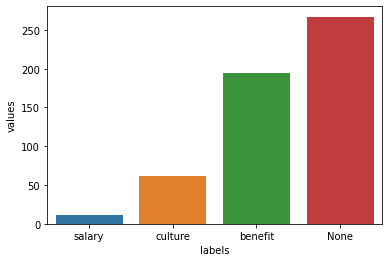

In [ ]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )